# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [ждем контеста] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11.75

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

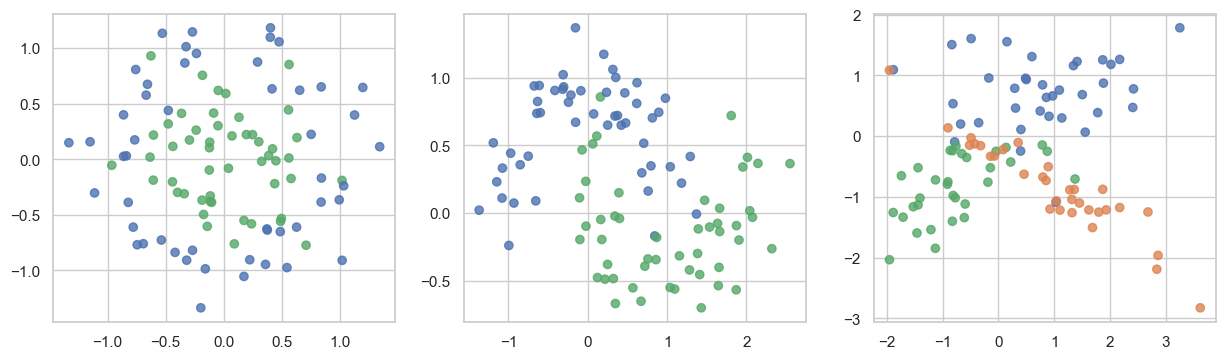

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

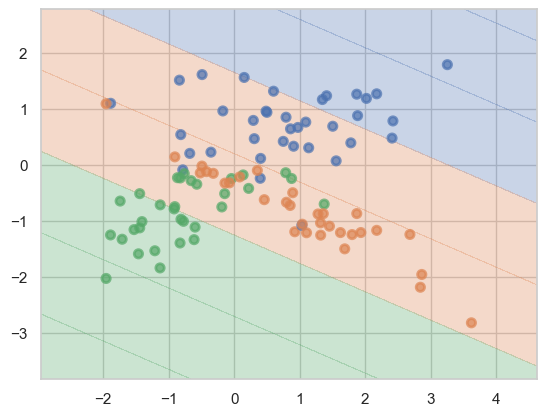

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
def train_tree(i, max_depth=None, min_samples_leaf=None):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
    if max_depth:
        tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        print(f"max_depth = {max_depth}, min_samples_leaf = {min_samples_leaf}")
    else:
        tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred_train = tree.predict(X_train)
    y_pred = tree.predict(X_test)
    print(f"Accuracy on train:\t{accuracy_score(y_train, y_pred_train):.2f}")
    print(f"Accuracy on test:\t{accuracy_score(y_test, y_pred):.2f}")
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plot_surface(tree, X_train, y_train)
    plt.title(f'Dataset {i}: train')

    plt.subplot(1, 2, 2)
    plot_surface(tree, X_test, y_test)
    plt.title(f'Dataset {i}: test')
    plt.show()

Accuracy on train:	1.00
Accuracy on test:	0.77


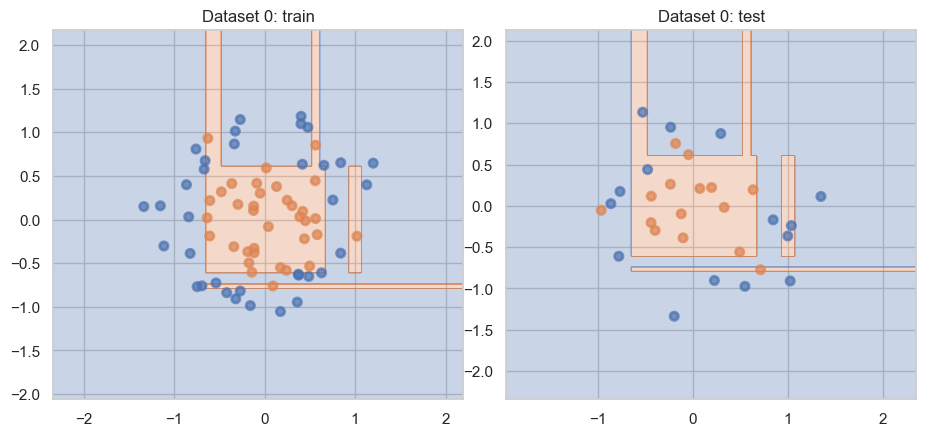

Accuracy on train:	1.00
Accuracy on test:	0.93


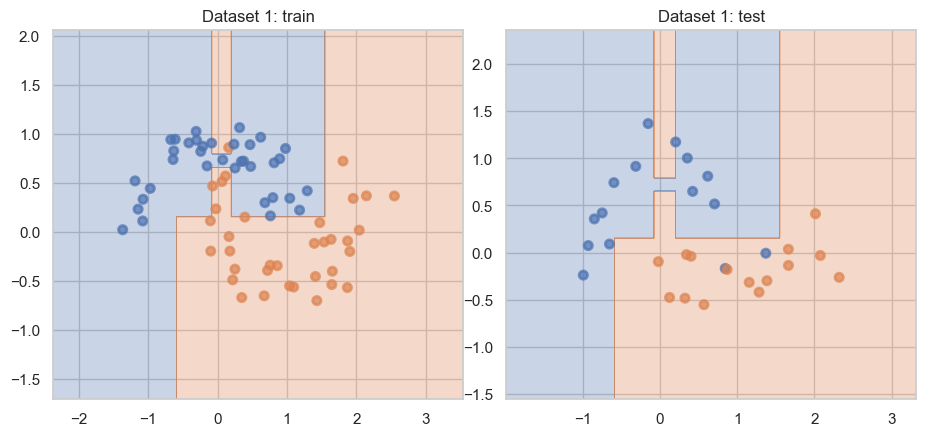

Accuracy on train:	1.00
Accuracy on test:	0.73


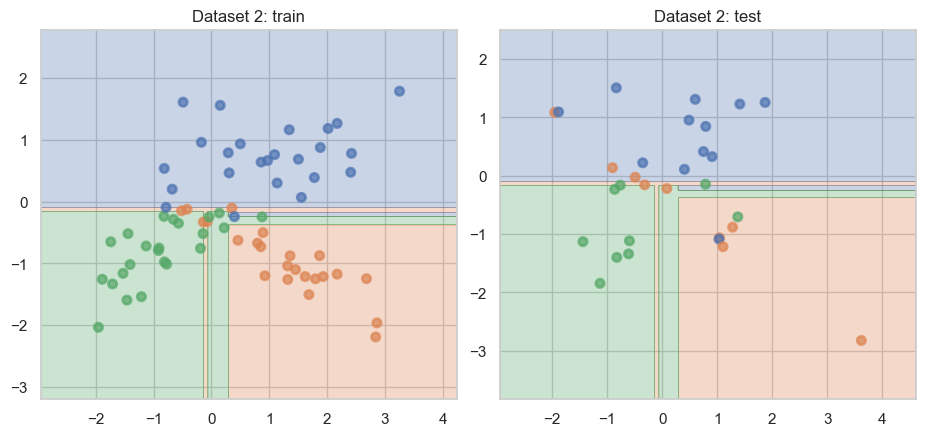

In [9]:
for i in range(len(datasets)):
    train_tree(i)

__Ответ:__ Деревья переобучились, они довольно сильно отвлекаются на шум входных данных. Во втором случае наименьше всего, так как на тесте качество не так сильно упало, как в других случаях.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

max_depth = 3, min_samples_leaf = 1
Accuracy on train:	0.91
Accuracy on test:	0.70


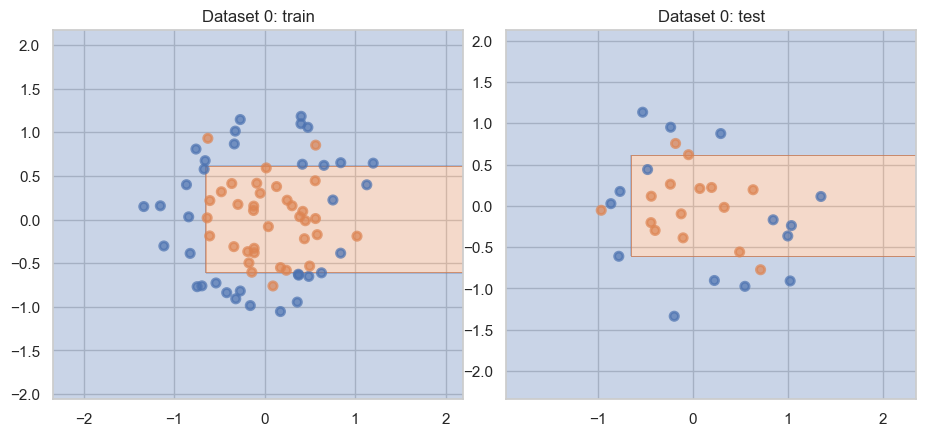

max_depth = 3, min_samples_leaf = 2
Accuracy on train:	0.91
Accuracy on test:	0.70


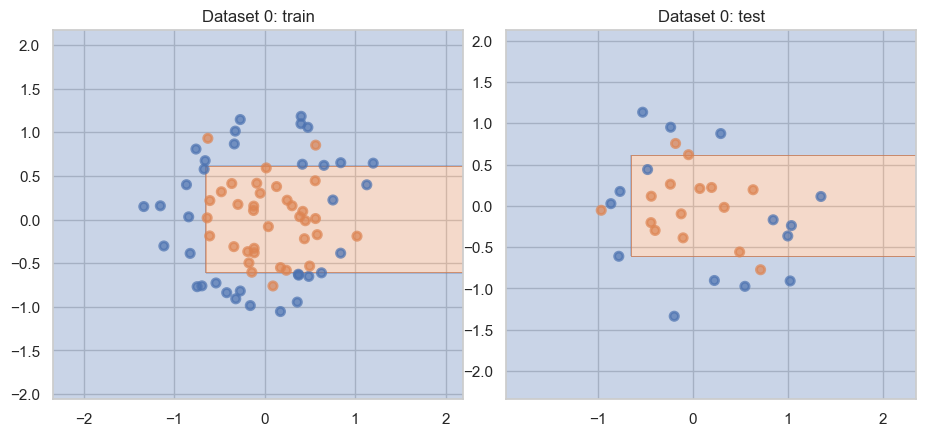

max_depth = 3, min_samples_leaf = 3
Accuracy on train:	0.91
Accuracy on test:	0.70


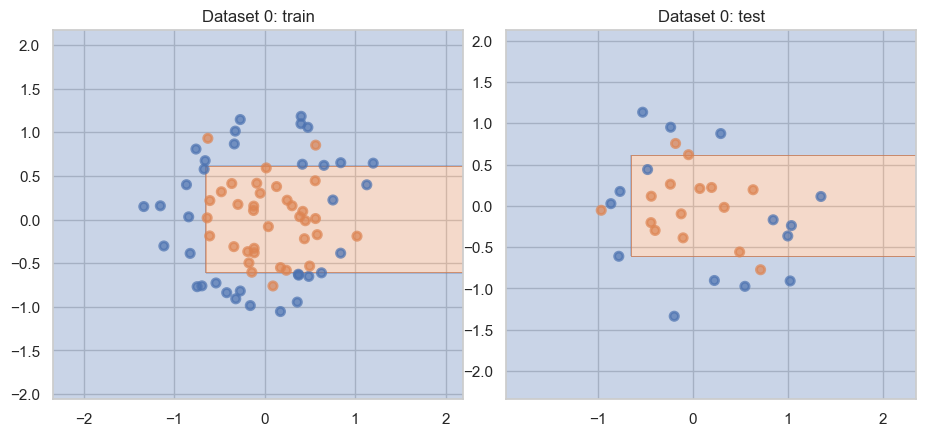

max_depth = 4, min_samples_leaf = 1
Accuracy on train:	0.97
Accuracy on test:	0.83


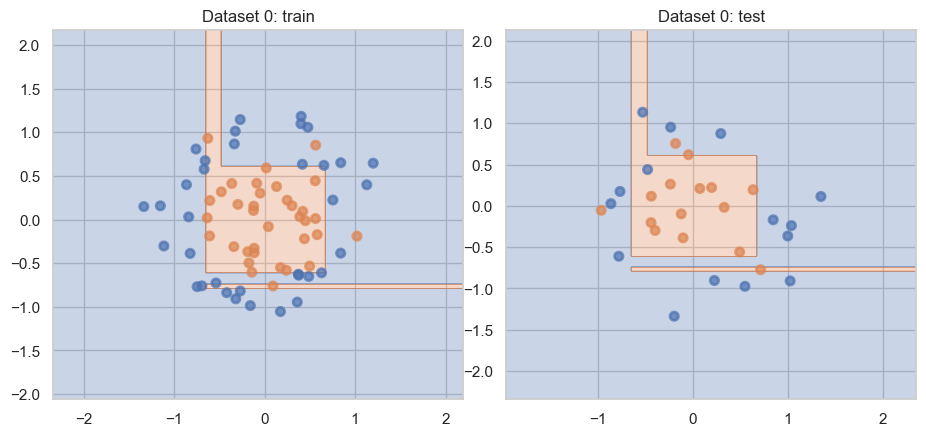

max_depth = 4, min_samples_leaf = 2
Accuracy on train:	0.94
Accuracy on test:	0.83


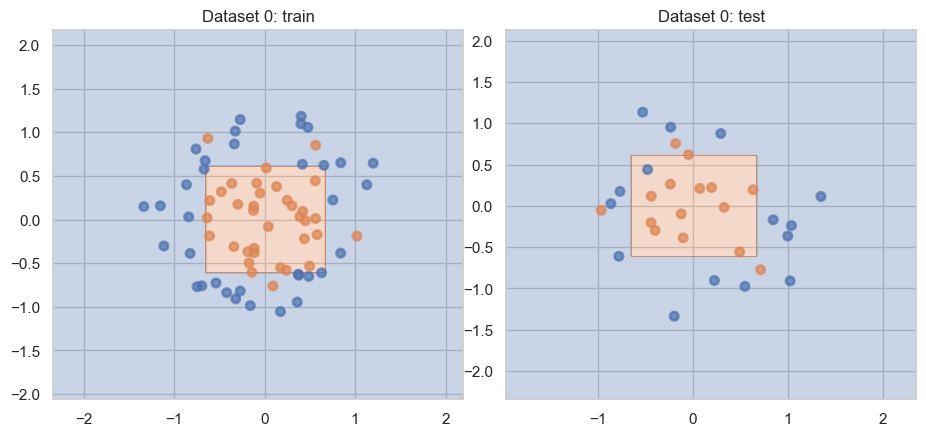

max_depth = 4, min_samples_leaf = 3
Accuracy on train:	0.94
Accuracy on test:	0.83


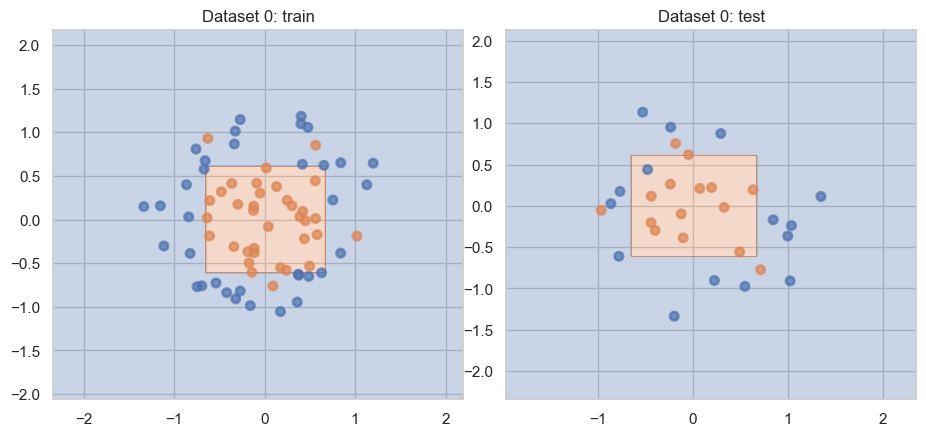

max_depth = 5, min_samples_leaf = 1
Accuracy on train:	0.97
Accuracy on test:	0.83


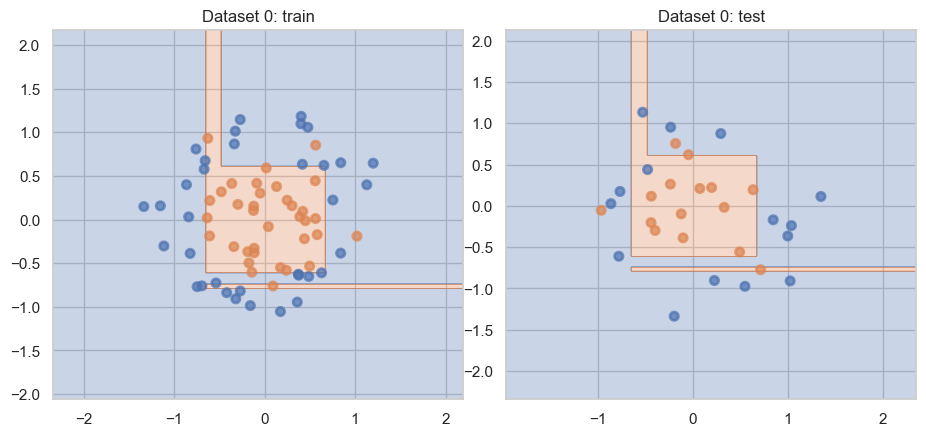

max_depth = 5, min_samples_leaf = 2
Accuracy on train:	0.94
Accuracy on test:	0.83


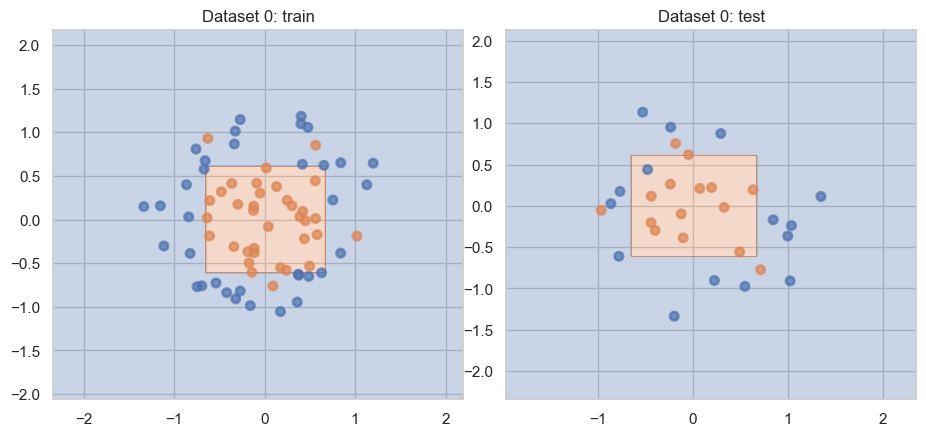

max_depth = 5, min_samples_leaf = 3
Accuracy on train:	0.96
Accuracy on test:	0.80


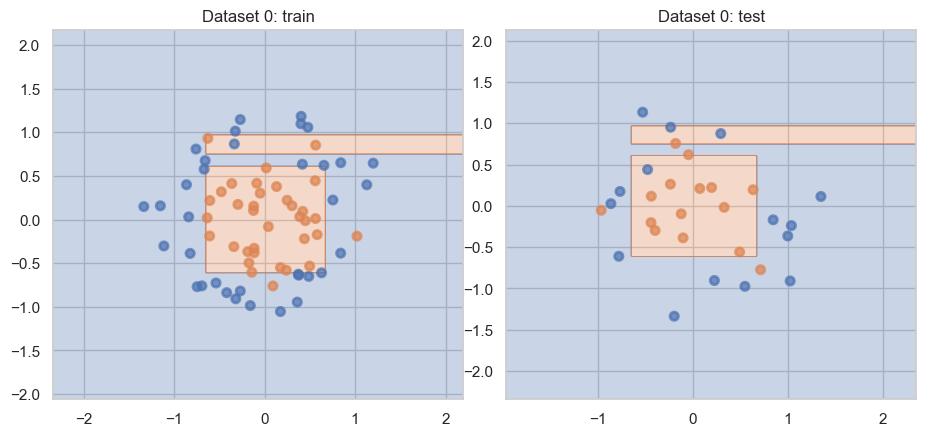

max_depth = 6, min_samples_leaf = 1
Accuracy on train:	1.00
Accuracy on test:	0.77


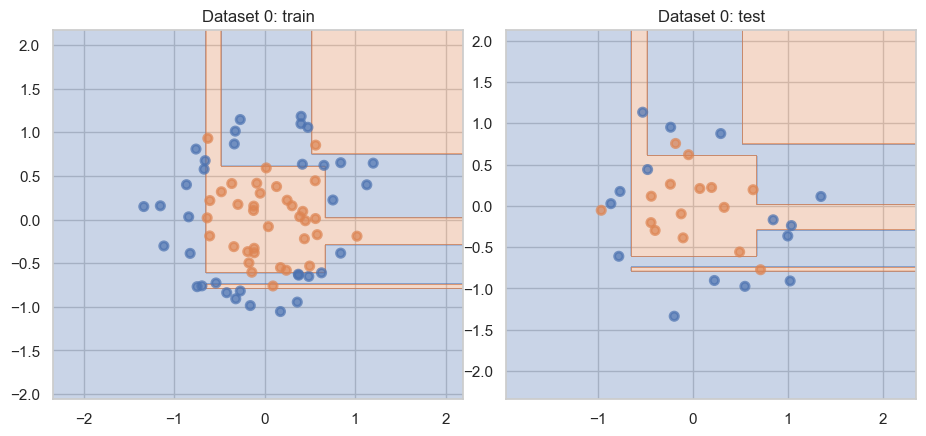

max_depth = 6, min_samples_leaf = 2
Accuracy on train:	0.94
Accuracy on test:	0.83


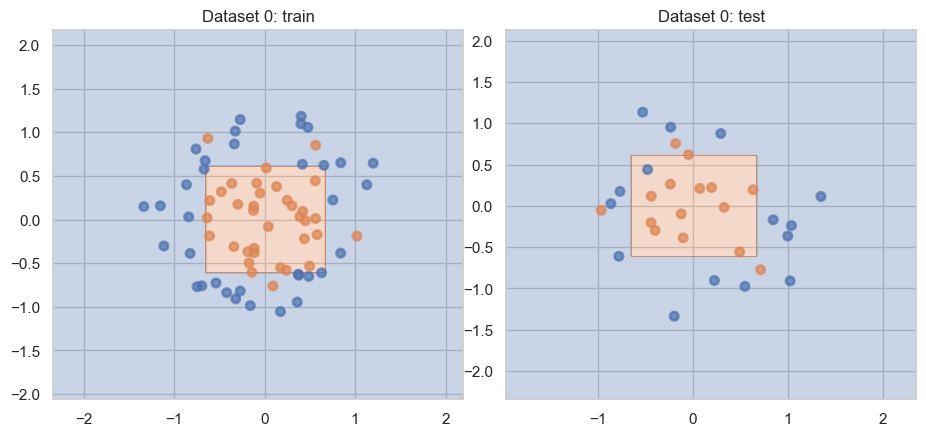

max_depth = 6, min_samples_leaf = 3
Accuracy on train:	0.96
Accuracy on test:	0.80


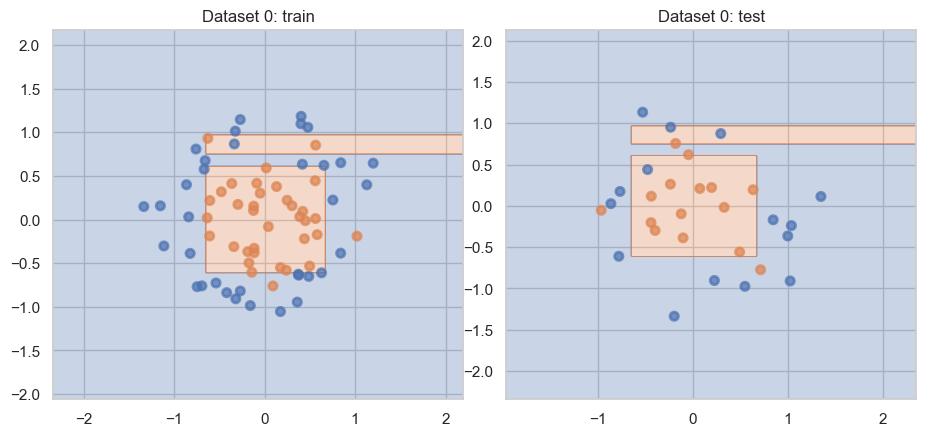

max_depth = 7, min_samples_leaf = 1
Accuracy on train:	1.00
Accuracy on test:	0.77


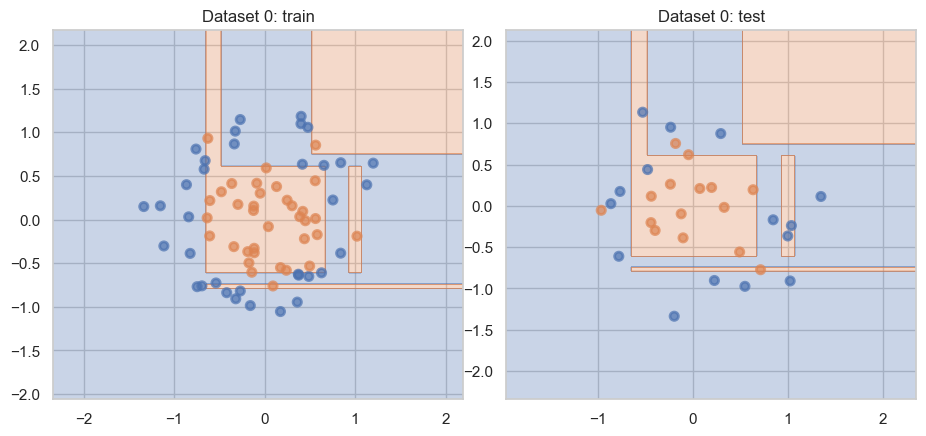

max_depth = 7, min_samples_leaf = 2
Accuracy on train:	0.94
Accuracy on test:	0.83


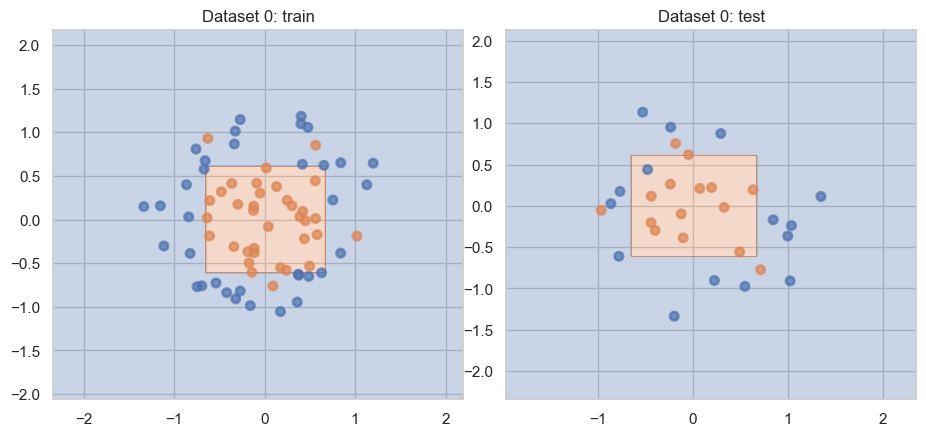

max_depth = 7, min_samples_leaf = 3
Accuracy on train:	0.96
Accuracy on test:	0.80


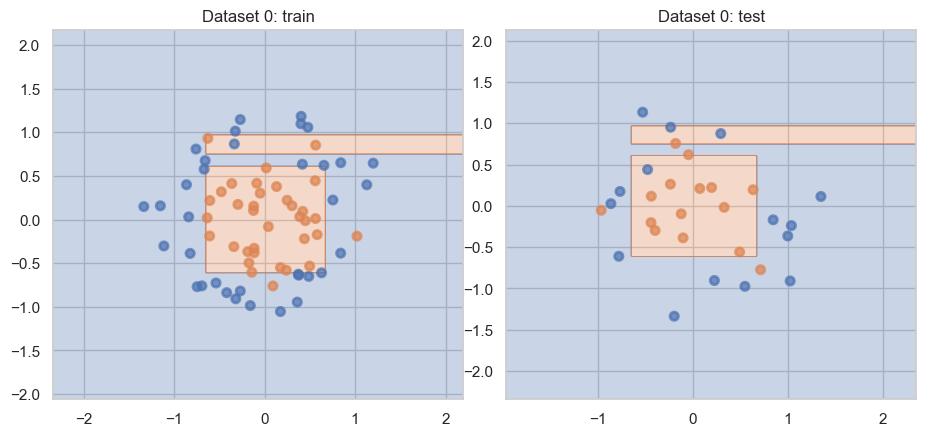

max_depth = 3, min_samples_leaf = 1
Accuracy on train:	0.93
Accuracy on test:	0.93


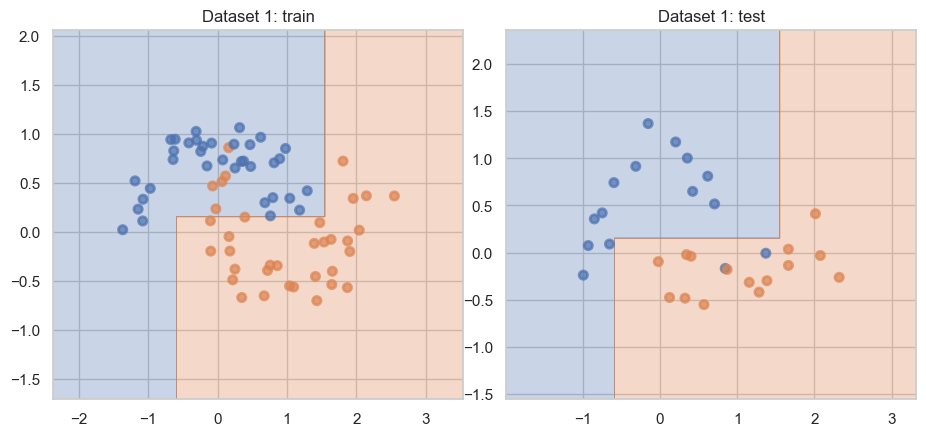

max_depth = 3, min_samples_leaf = 2
Accuracy on train:	0.93
Accuracy on test:	0.93


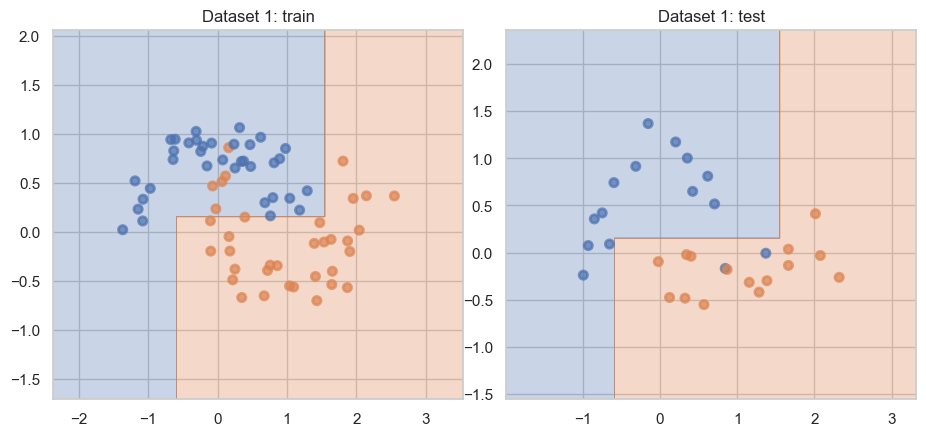

max_depth = 3, min_samples_leaf = 3
Accuracy on train:	0.91
Accuracy on test:	0.93


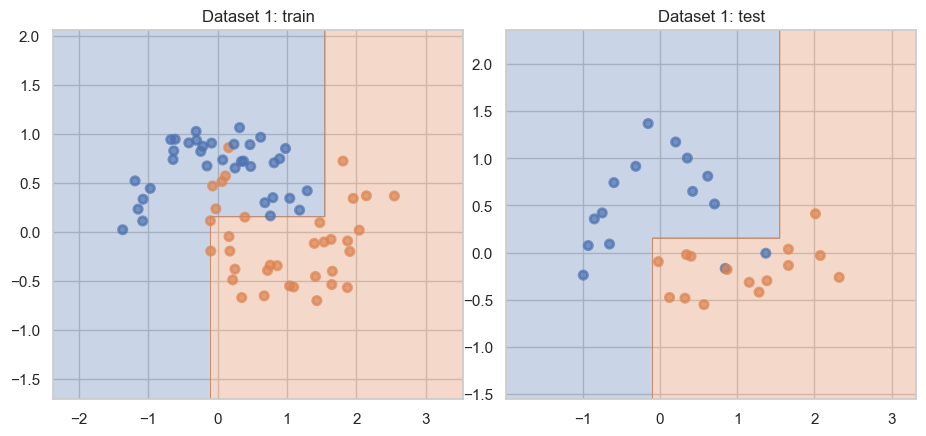

max_depth = 4, min_samples_leaf = 1
Accuracy on train:	0.99
Accuracy on test:	0.93


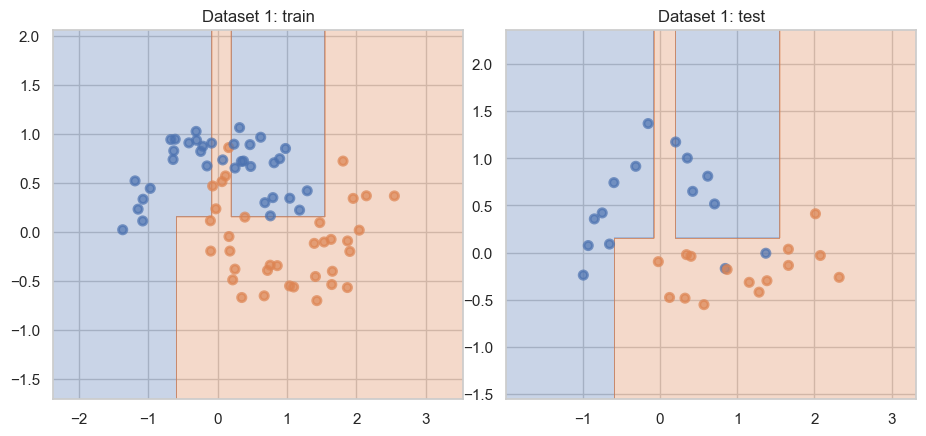

max_depth = 4, min_samples_leaf = 2
Accuracy on train:	0.99
Accuracy on test:	0.93


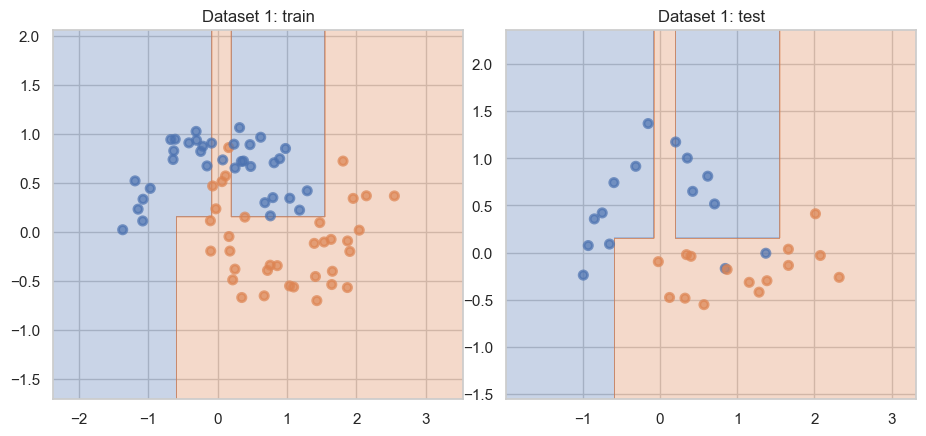

max_depth = 4, min_samples_leaf = 3
Accuracy on train:	0.97
Accuracy on test:	0.93


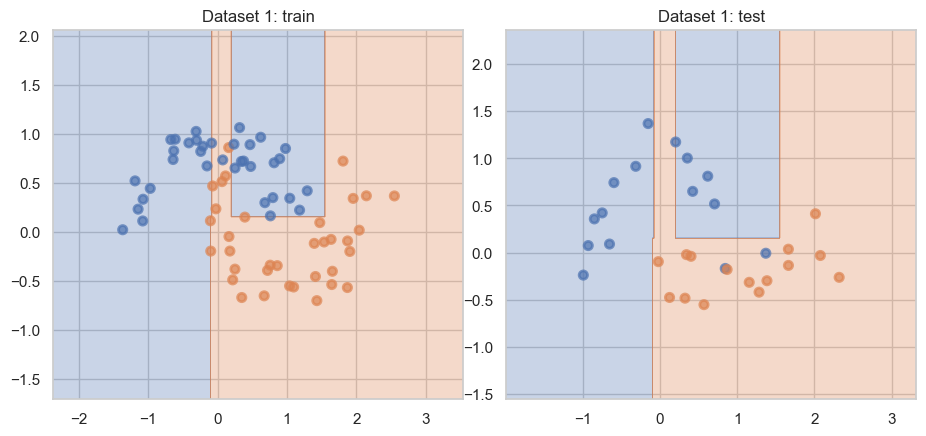

max_depth = 5, min_samples_leaf = 1
Accuracy on train:	0.99
Accuracy on test:	0.93


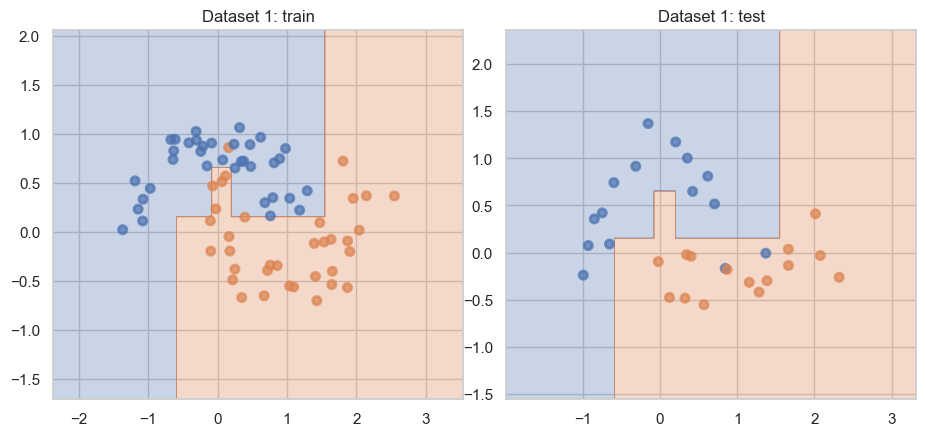

max_depth = 5, min_samples_leaf = 2
Accuracy on train:	0.99
Accuracy on test:	0.93


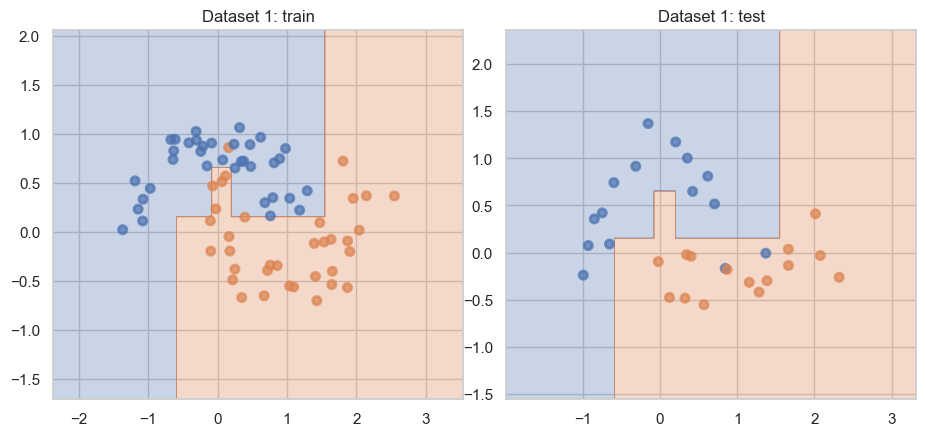

max_depth = 5, min_samples_leaf = 3
Accuracy on train:	0.97
Accuracy on test:	0.93


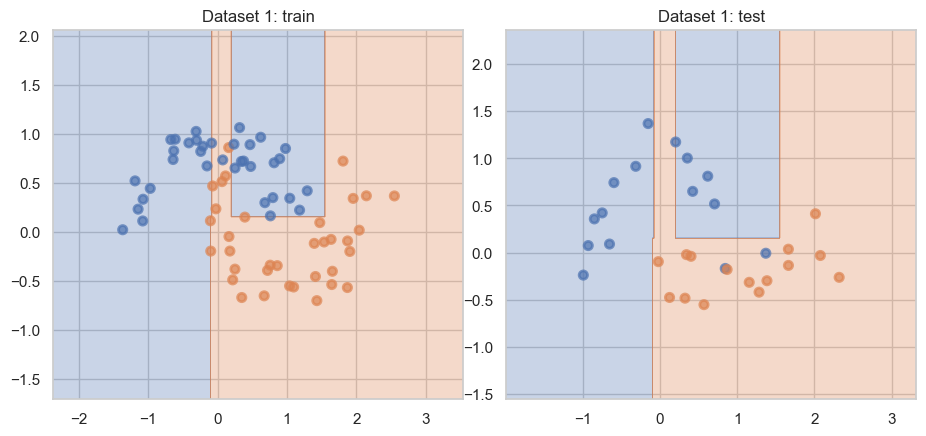

max_depth = 6, min_samples_leaf = 1
Accuracy on train:	1.00
Accuracy on test:	0.93


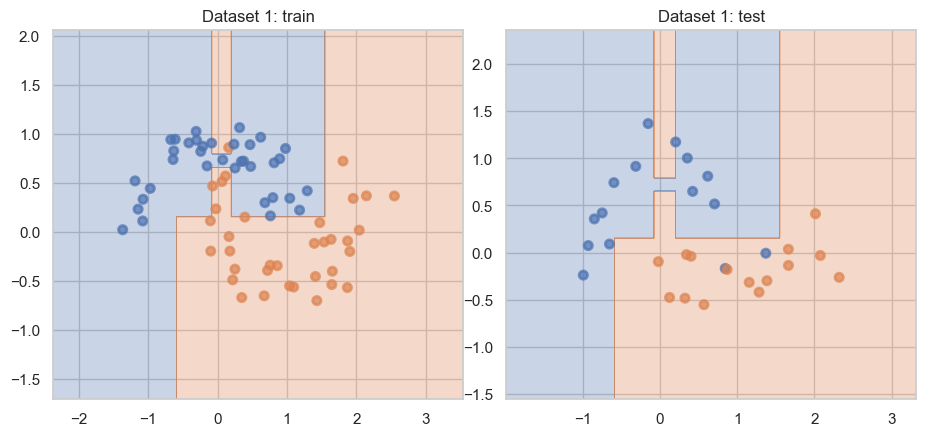

max_depth = 6, min_samples_leaf = 2
Accuracy on train:	0.99
Accuracy on test:	0.93


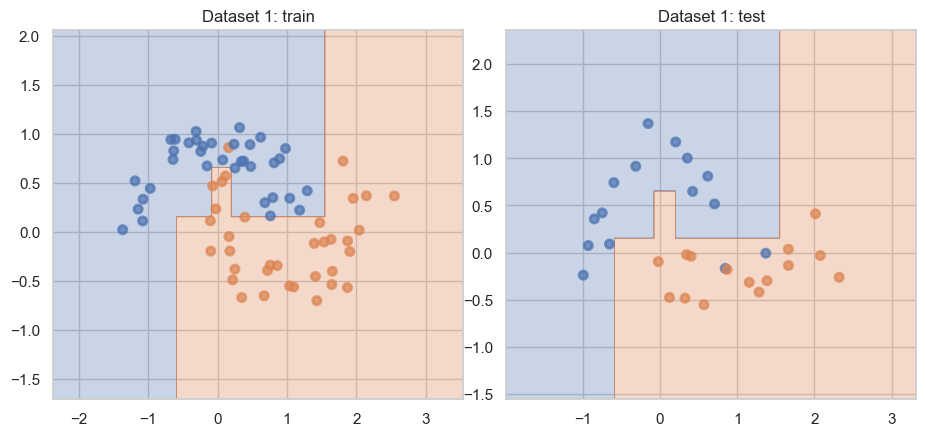

max_depth = 6, min_samples_leaf = 3
Accuracy on train:	0.97
Accuracy on test:	0.93


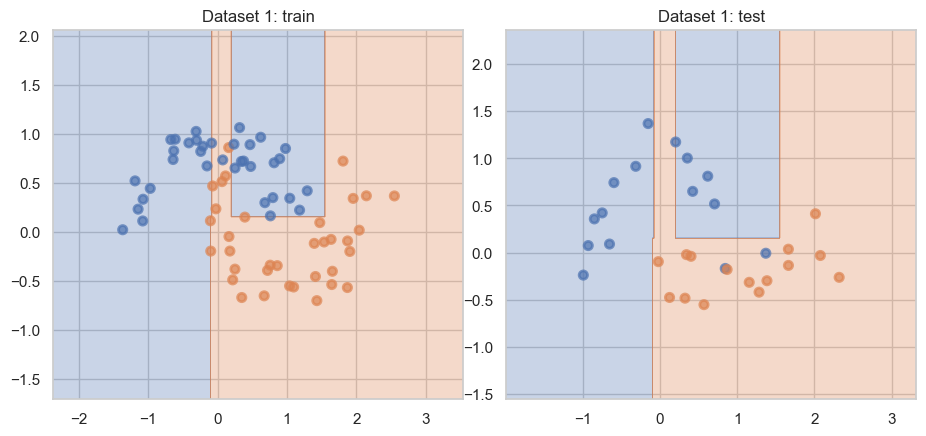

max_depth = 7, min_samples_leaf = 1
Accuracy on train:	1.00
Accuracy on test:	0.93


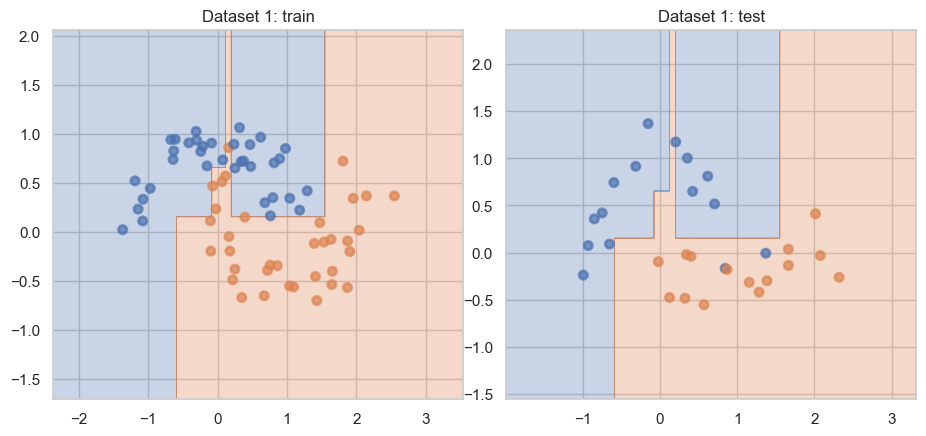

max_depth = 7, min_samples_leaf = 2
Accuracy on train:	0.99
Accuracy on test:	0.93


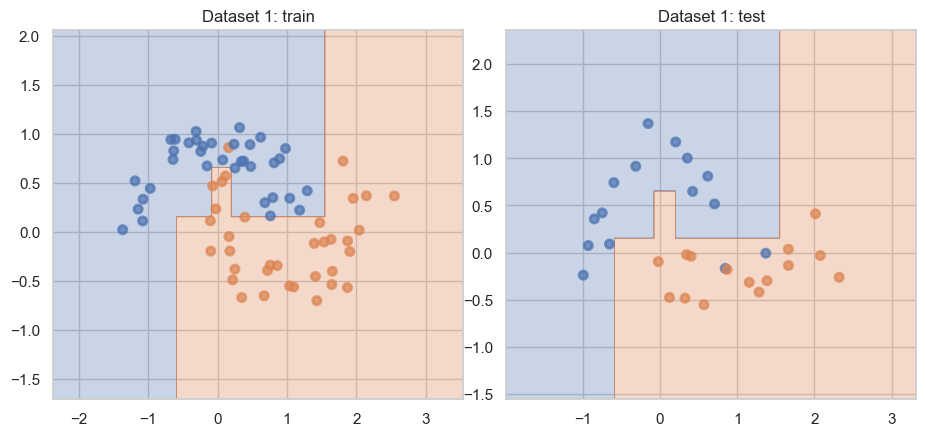

max_depth = 7, min_samples_leaf = 3
Accuracy on train:	0.97
Accuracy on test:	0.93


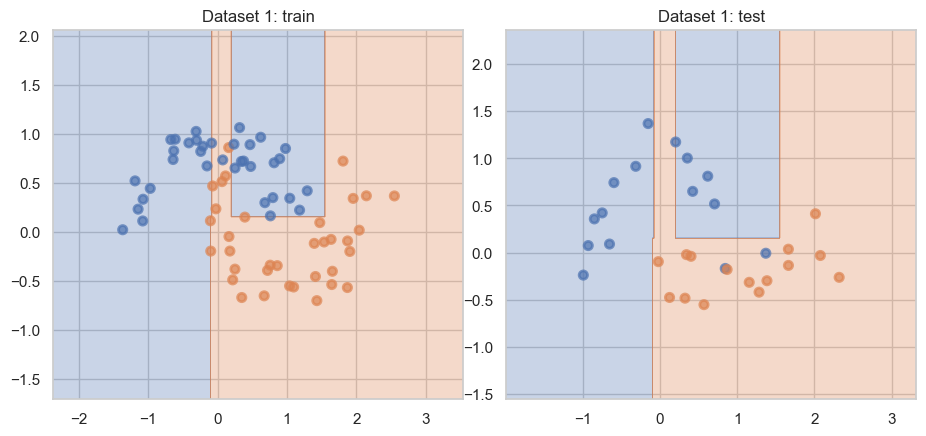

max_depth = 3, min_samples_leaf = 1
Accuracy on train:	0.94
Accuracy on test:	0.73


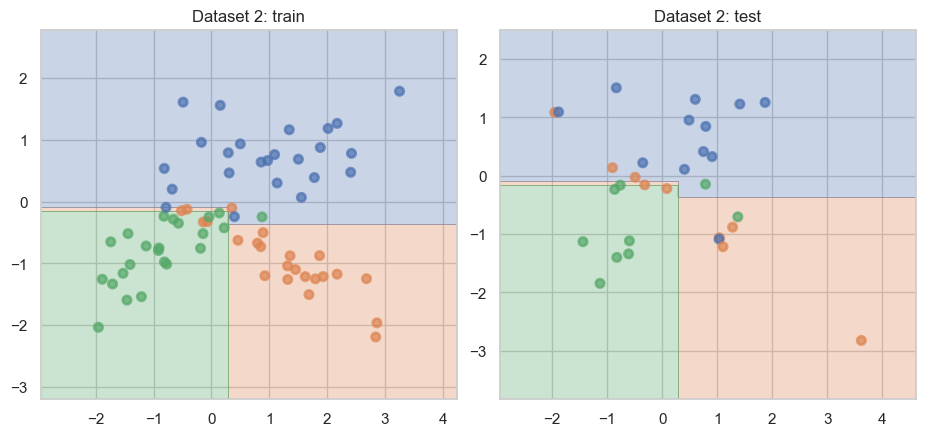

max_depth = 3, min_samples_leaf = 2
Accuracy on train:	0.94
Accuracy on test:	0.73


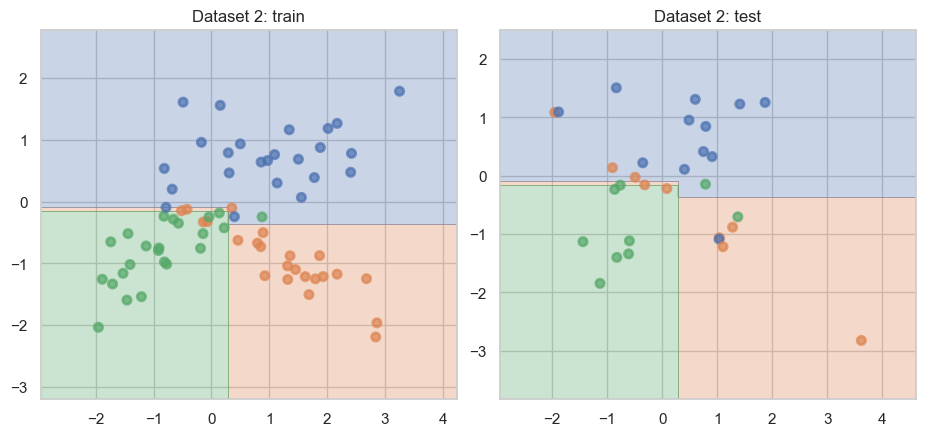

max_depth = 3, min_samples_leaf = 3
Accuracy on train:	0.91
Accuracy on test:	0.73


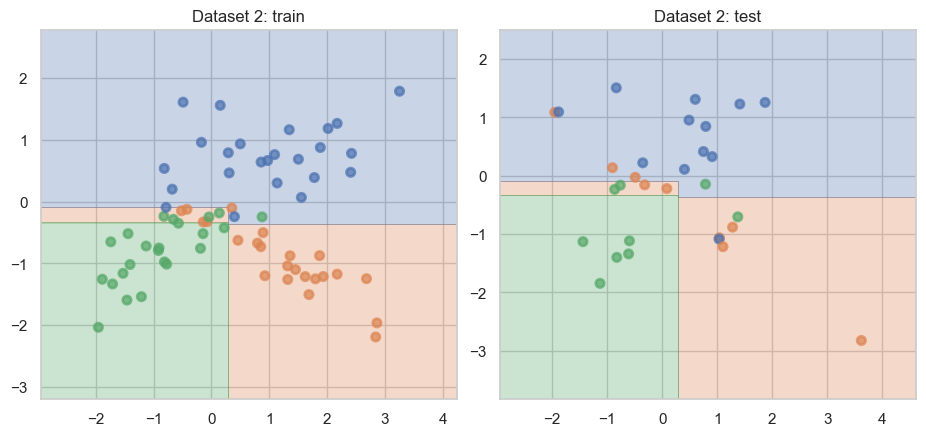

max_depth = 4, min_samples_leaf = 1
Accuracy on train:	0.96
Accuracy on test:	0.73


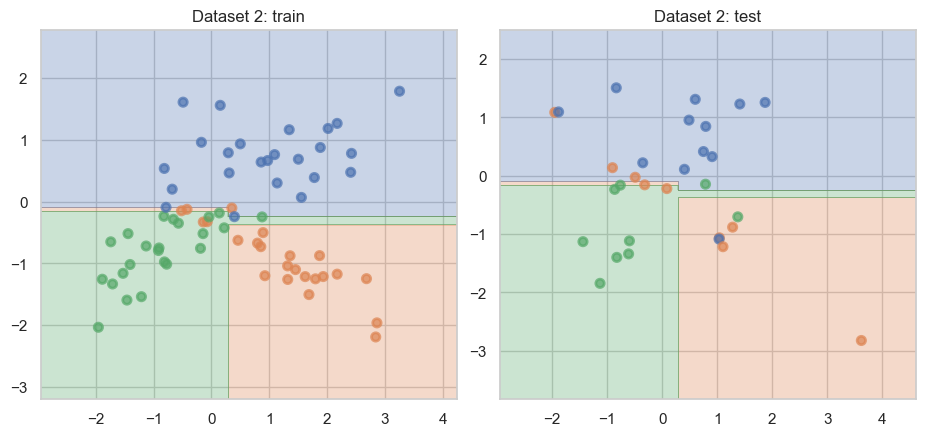

max_depth = 4, min_samples_leaf = 2
Accuracy on train:	0.94
Accuracy on test:	0.73


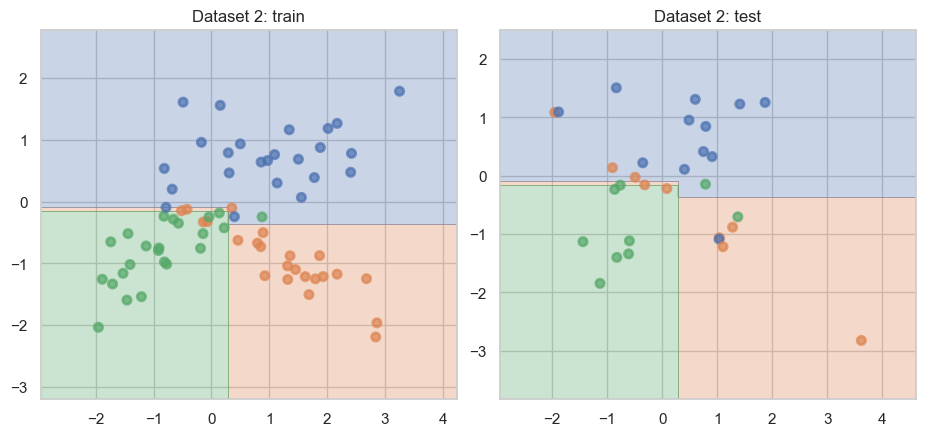

max_depth = 4, min_samples_leaf = 3
Accuracy on train:	0.93
Accuracy on test:	0.73


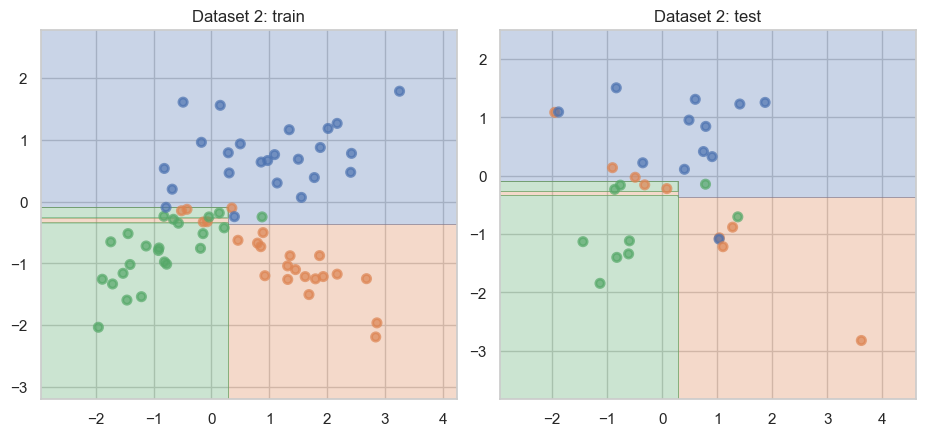

max_depth = 5, min_samples_leaf = 1
Accuracy on train:	1.00
Accuracy on test:	0.73


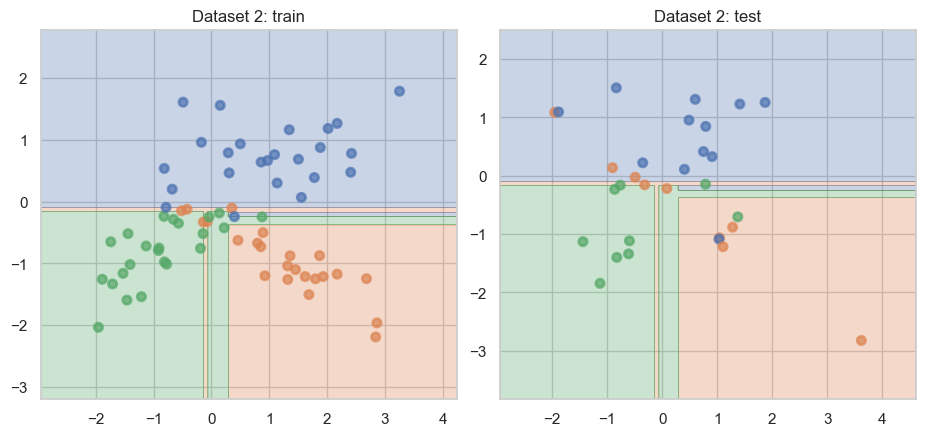

max_depth = 5, min_samples_leaf = 2
Accuracy on train:	0.97
Accuracy on test:	0.73


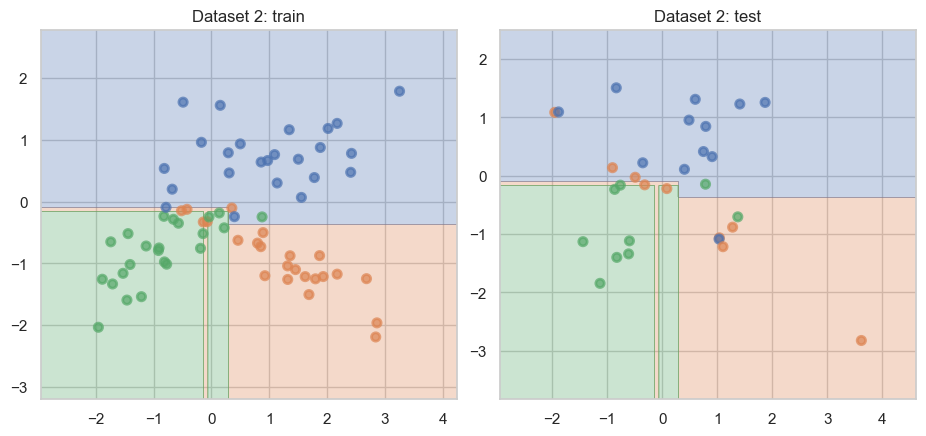

max_depth = 5, min_samples_leaf = 3
Accuracy on train:	0.93
Accuracy on test:	0.73


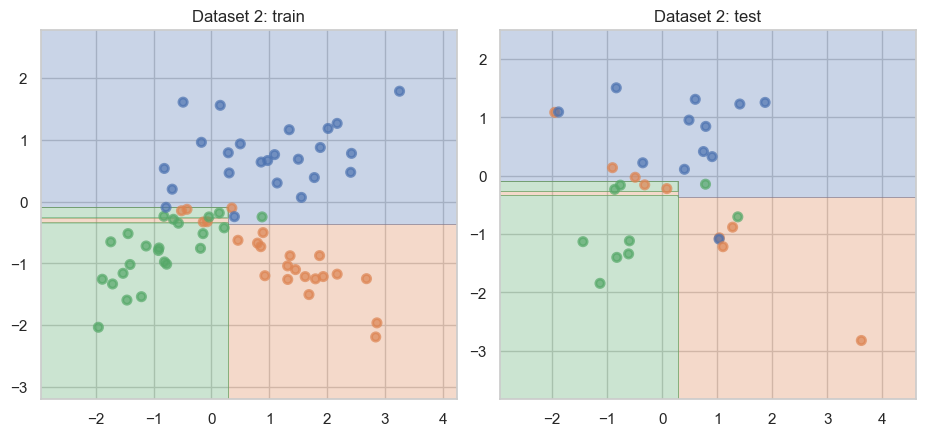

max_depth = 6, min_samples_leaf = 1
Accuracy on train:	1.00
Accuracy on test:	0.73


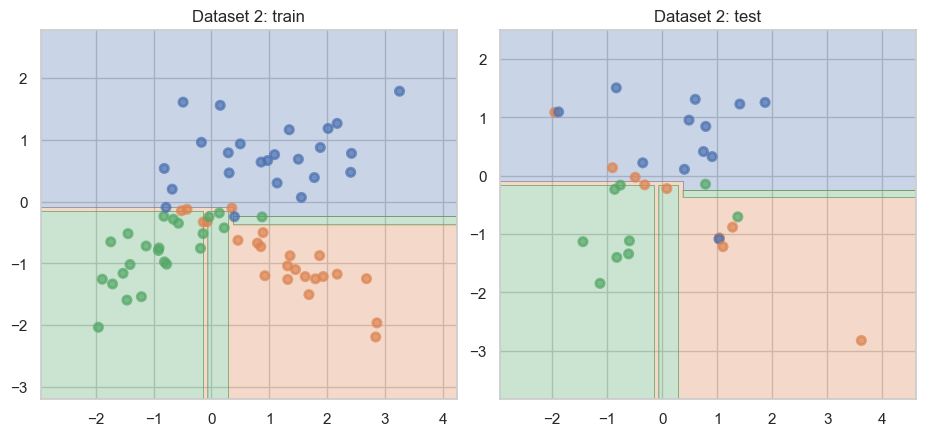

max_depth = 6, min_samples_leaf = 2
Accuracy on train:	0.97
Accuracy on test:	0.73


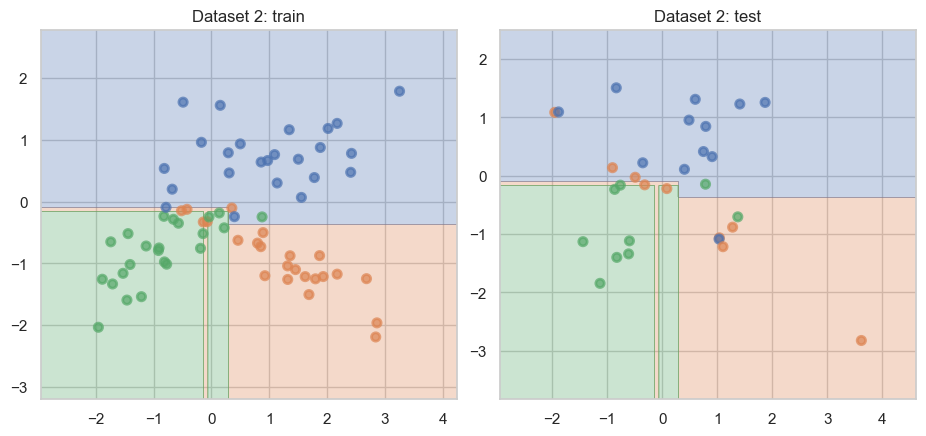

max_depth = 6, min_samples_leaf = 3
Accuracy on train:	0.93
Accuracy on test:	0.73


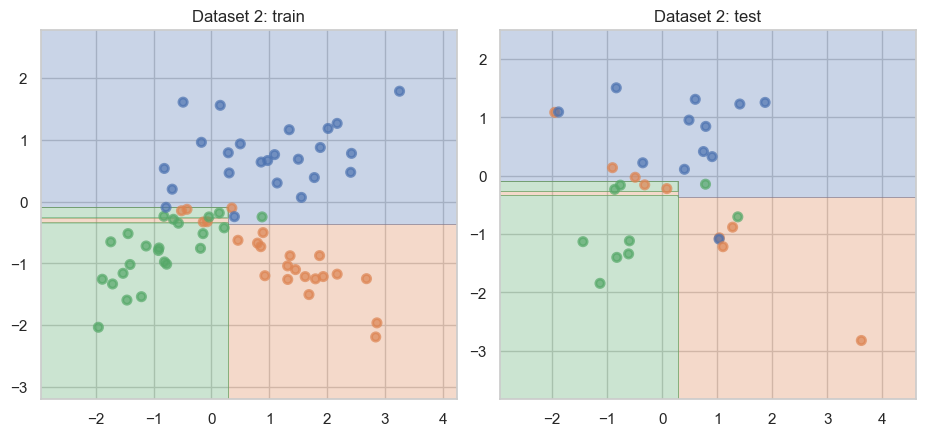

max_depth = 7, min_samples_leaf = 1
Accuracy on train:	1.00
Accuracy on test:	0.73


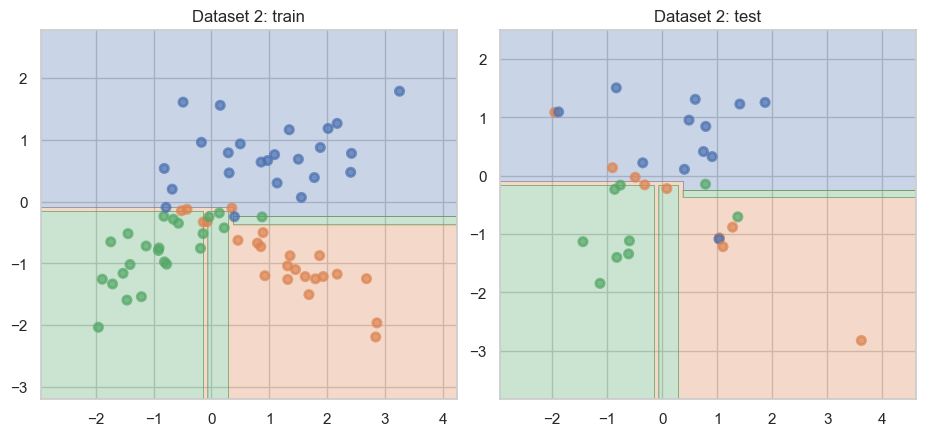

max_depth = 7, min_samples_leaf = 2
Accuracy on train:	0.97
Accuracy on test:	0.73


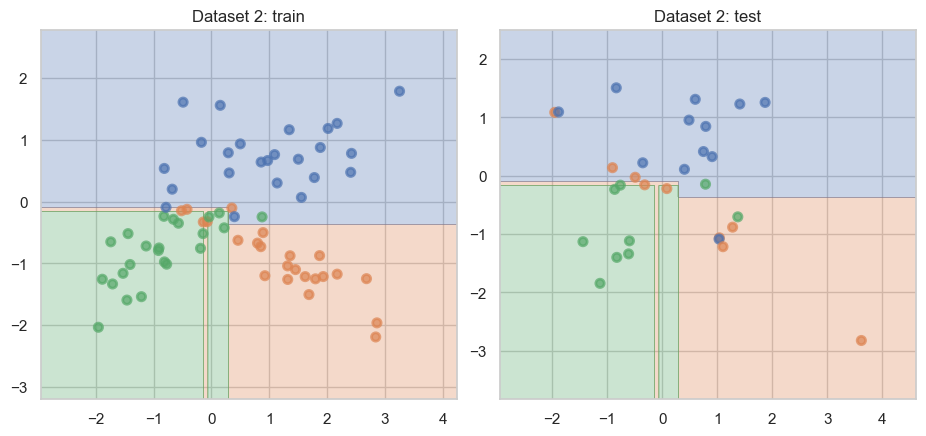

max_depth = 7, min_samples_leaf = 3
Accuracy on train:	0.93
Accuracy on test:	0.73


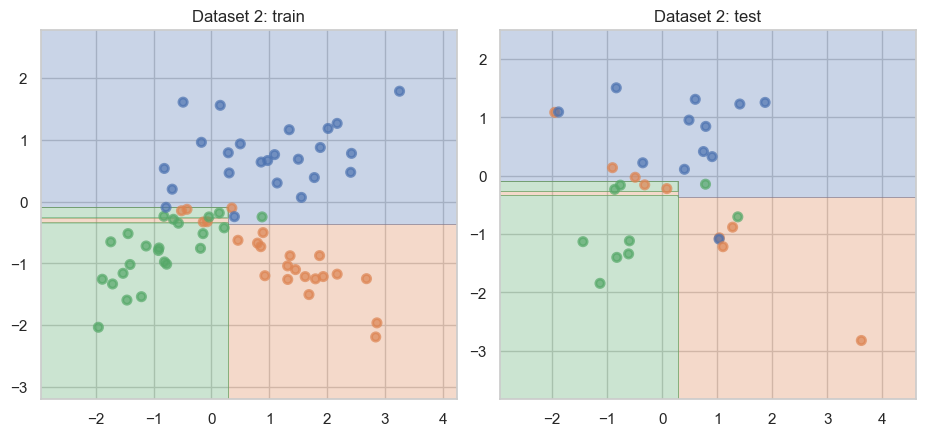

In [10]:
for j in range(len(datasets)):
    for depth in [i for i in range(3, 8)]:
        for samples_leaf in [i for i in range(1, 4)]:
            train_tree(j, depth, samples_leaf)

__Ответ:__  
С увеличением глубины обобщающая способность ухудшается, => появляется много лишних разделяющих плоскостей и дерево сильнее переобучается.  
С увеличением минимального количества объектов в листе обобщающая способность улучшается, так как дерево меньше подстраивается под отдельные объекты. Следовательно, появляется меньше разделяющих плоскостей.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/72492/run-report/129463838/  
mikhailchizhmar

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/esokolov/ml-course-hse/refs/heads/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [12]:
import hw5code

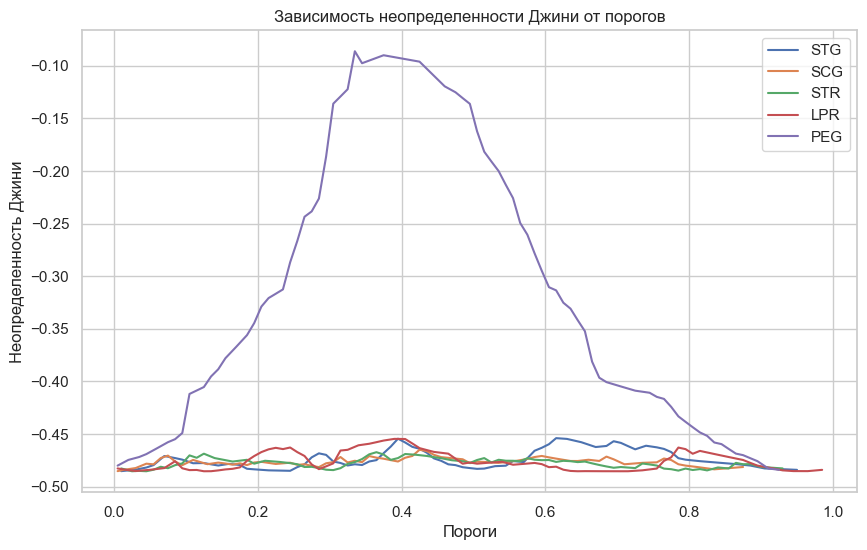

In [13]:
plt.figure(figsize=(10, 6))
features = df.columns[:-1]
for feature in features:
    thresholds, ginis, threshold_best, gini_best = hw5code.find_best_split(df[feature].values, df['UNS'].values)
    plt.plot(thresholds, ginis, label=feature)

plt.title('Зависимость неопределенности Джини от порогов')
plt.xlabel('Пороги')
plt.ylabel('Неопределенность Джини')
plt.legend();

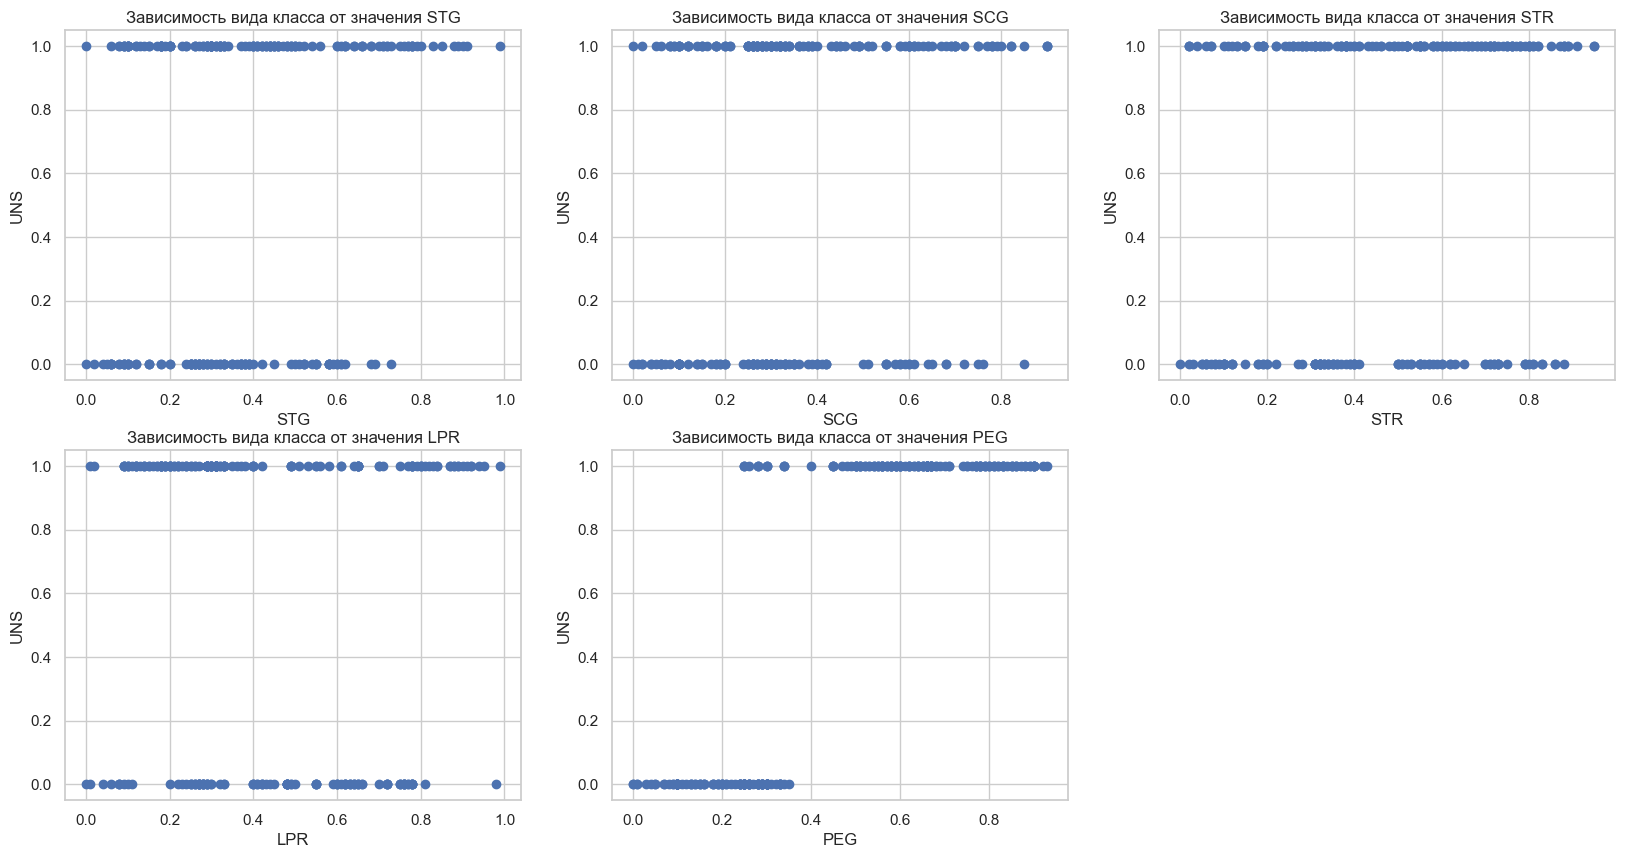

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

features = df.columns[:-1]
for i, feature in enumerate(features):
    axes[i//3, i%3].scatter(df[feature].values, df['UNS'].values, label=feature)
    axes[i//3, i%3].set_title(f'Зависимость вида класса от значения {feature}')
    axes[i//3, i%3].set_xlabel(f'{feature}')
    axes[i//3, i%3].set_ylabel('UNS')

fig.delaxes(axes[1, 2])

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Для разбиения стоит использовать признак PEG, так как при нем достигается максимальное значение неопределенности Джини. Scatter-графики подтверждают это, так как на графике признака PEG мы видим четкие пороги разделения классов (< 0.22 или > 0.38). Предполагаю, что у "хороших" признаков кривая должна иметь вид нормального распределения. У "плохих" признаков кривая незначительно колеблется вокруг одного значения.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/esokolov/ml-course-hse/refs/heads/master/2023-fall/homeworks-practice/homework-practice-05-trees/agaricus-lepiota.data")
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# df["p"].value_counts()
# df["p"] = df["p"].map({"e": 0, "p": 1})
df = df.apply(LabelEncoder().fit_transform)

In [18]:
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["p"]), df["p"], test_size=0.5, random_state=17)

In [20]:
feature_types = ['categorical'] * X_train.shape[1]

tree = hw5code.DecisionTree(feature_types)
tree.fit(X_train.values, y_train.values)

y_pred_train = tree.predict(X_train.values)
y_pred = tree.predict(X_test.values)

print(f'Train accuracy:\t{accuracy_score(y_train, y_pred_train):.2f}')
print(f'Test accuracy:\t{accuracy_score(y_test, y_pred):.2f}')

Train accuracy:	1.00
Test accuracy:	1.00


In [21]:
tree.get_depth()

5

__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe.

In [22]:
df = pd.read_csv("tic-tac-toe-endgame.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [23]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["V10"]), df["V10"], test_size=0.2, random_state=17)

In [25]:
def train_with_params(param_name):
    feature_types = ['categorical'] * X_train.shape[1]
    accuracy_train = []
    accuracy_test = []
    for p in range(1, 41):
        params = {param_name: p}
        tree = hw5code.DecisionTree(feature_types, **params)
        tree.fit(X_train.values, y_train.values)
        y_pred_train = tree.predict(X_train.values)
        y_pred = tree.predict(X_test.values)
       
        accuracy_train.append(accuracy_score(y_train.values, y_pred_train))
        accuracy_test.append(accuracy_score(y_test.values, y_pred))

    plt.figure(figsize=(10, 5))
    plt.plot(accuracy_train, label='Train')
    plt.plot(accuracy_test, label='Test')

    plt.title(f'Accuracy при использовании гиперпараметра {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

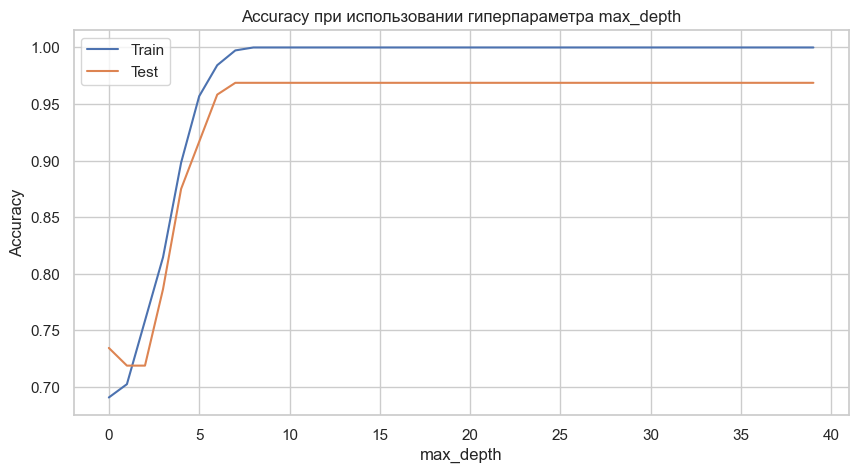

In [26]:
train_with_params('max_depth')

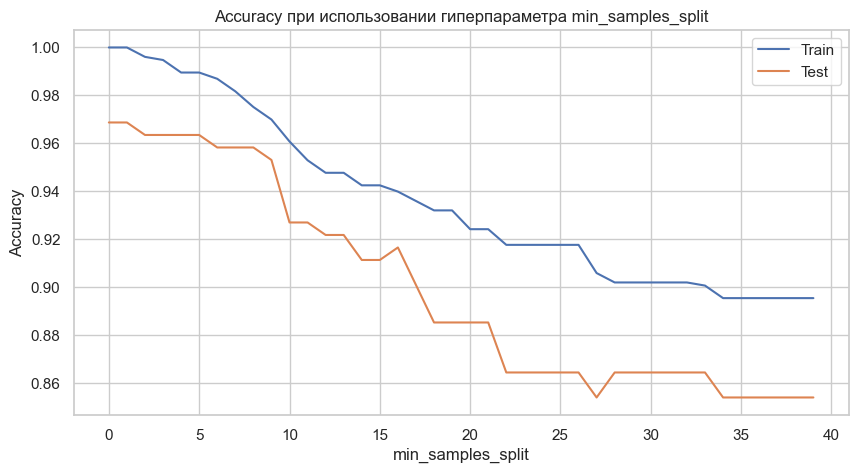

In [27]:
train_with_params('min_samples_split')

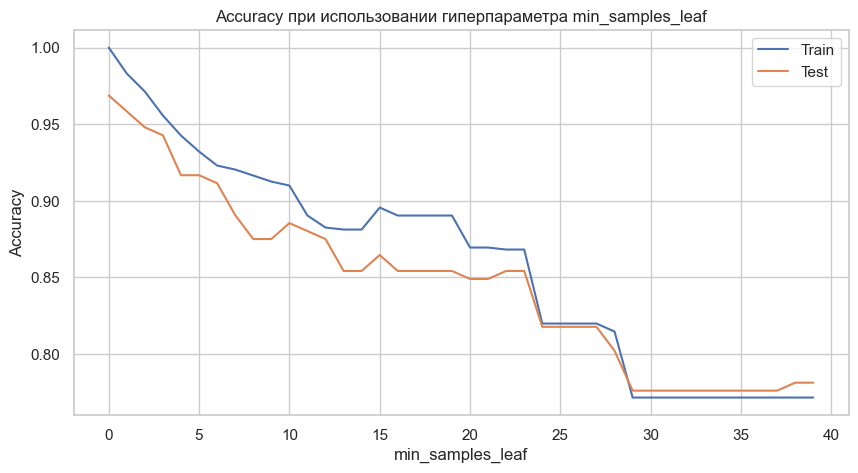

In [28]:
train_with_params('min_samples_leaf')

https://contest.yandex.ru/contest/72492/run-report/129463942/  
mikhailchizhmar

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Итерируетесь по всем порогам
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing(as_frame=True)
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [30]:
def optimal_params(model_type, X, y):
    best_max_depth = 0
    best_min_samples_split = 0
    best_min_samples_leaf = 0
    best_mse = 0

    for max_depth in [5, 10, 15]:
        for min_samples_split in [2, 6, 10]:
            for min_samples_leaf in [1, 3, 5]:
                params = {"max_depth": max_depth, "min_samples_split": min_samples_split, "min_samples_leaf": min_samples_leaf}
                if model_type == "my":
                    model = hw5code.LinearRegressionTree(["real"] * X.shape[1], **params)
                else:
                    model = DecisionTreeRegressor(**params)
    
                model.fit(X_train.values, y_train.values)
                y_pred = model.predict(X_test.values)
    
                mse = mean_squared_error(y_test, y_pred)
    
            if mse > best_mse:
                best_mse = mse
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split
                best_min_samples_leaf = min_samples_leaf

    return best_max_depth, best_min_samples_split, best_min_samples_leaf, best_mse

In [31]:
my_max_depth, my_min_samples_split, my_min_samples_leaf, my_mse = optimal_params("my", X, y)
print("LinearRegressionTree:")
print(f"\tBest MSE:               {my_mse:.3f}")
print(f"\tBest max_depth:         {my_max_depth}")
print(f"\tBest min_samples_split: {my_min_samples_split}")
print(f"\tBest min_samples_leaf:  {my_min_samples_leaf}")

LinearRegressionTree:
	Best MSE:               41.502
	Best max_depth:         15
	Best min_samples_split: 2
	Best min_samples_leaf:  5




In [32]:
sklearn_max_depth, sklearn_min_samples_split, sklearn_min_samples_leaf, sklearn_mse = optimal_params("sklearn", X, y)
print("DecisionTreeRegressor:")
print(f"\tBest MSE:               {sklearn_mse:.3f}")
print(f"\tBest max_depth:         {sklearn_max_depth}")
print(f"\tBest min_samples_split: {sklearn_min_samples_split}")
print(f"\tBest min_samples_leaf:  {sklearn_min_samples_leaf}")

DecisionTreeRegressor:
	Best MSE:               0.502
	Best max_depth:         5
	Best min_samples_split: 2
	Best min_samples_leaf:  5




Реализация из sklearn намного быстрее работает, да и качество у неё получается лучше. Из параметров совпали только min_samples_leaf.

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [33]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

params = {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}

my_tree = hw5code.LinearRegressionTree(["real"] * x_train.shape[1], **params)
my_tree.fit(x_train, y_train)
y_pred_my = my_tree.predict(x_test)

sklearn_tree = DecisionTreeRegressor(**params)
sklearn_tree.fit(x_train, y_train)
y_pred_sklearn = sklearn_tree.predict(x_test)

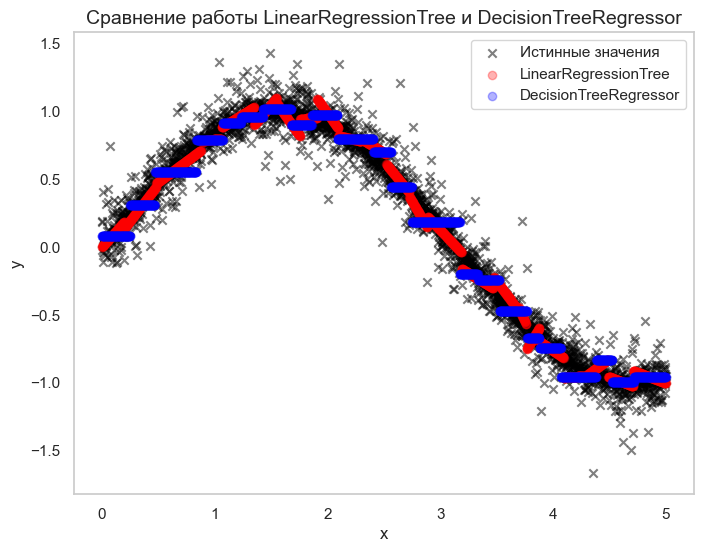

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='black', alpha=0.5, label='Истинные значения', marker='x')
plt.scatter(x_test, y_pred_my, color='red', alpha=0.3, label='LinearRegressionTree')
plt.scatter(x_test, y_pred_sklearn, color='blue', alpha=0.3, label='DecisionTreeRegressor')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Сравнение работы LinearRegressionTree и DecisionTreeRegressor', fontsize=14)
plt.legend()
plt.grid()
plt.show()

**Ответ:** График наглядно показывает главное различие реализаций: в sklearn ответ в листах - это среднее, а в нашей реализации - это линейная модель. В некоторых местах наша модель сильно отвлекается на шум. Это и не удивительно, потому что при поиске наилучшего разбиения мы используем MSE. Тем не менее, тренд в нашем случае достаточно хорошо описывается.

Вставьте что угодно, описывающее ваши впечатления от этого задания: